# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()
%matplotlib inline

In [3]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv("NEWS_API_KEY")


In [4]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_articles = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")


In [6]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_articles = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")

In [7]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
btc_sentiments = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head(5)


,date,text,compound,positive,negative,neutral
0,2020-09-24,Image copyrightChandler GuoImage caption\r\n C...,0.2500,0.065,0.000,0.935
1,2020-10-19,World News\r\nAlexis Akwagyiram\r\nLAGOS (Reut...,-0.6597,0.000,0.198,0.802
2,2020-09-22,A US district judge has sentenced a UK Nationa...,-0.5267,0.000,0.128,0.872
3,2020-10-19,Emerging Markets\r\nAlexis Akwagyiram\r\nLAGOS...,-0.6597,0.000,0.203,0.797
4,2020-09-24,"July 15 was, at first, just another day for Pa...",0.0000,0.000,0.000,1.000


In [8]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
eth_sentiments = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head(5)


,date,text,compound,positive,negative,neutral
0,2020-10-15,Breitling is partnering with Arianee to issue ...,0.0000,0.000,0.000,1.000
1,2020-09-18,"September\r\n18, 2020\r\n6 min read\r\nOpinion...",0.0000,0.000,0.000,1.000
2,2020-09-30,"September\r\n30, 2020\r\n8 min read\r\nOpinion...",-0.2960,0.000,0.061,0.939
3,2020-10-14,Portions of the global economy melted down in ...,-0.4215,0.085,0.132,0.783
4,2020-10-02,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.090,0.000,0.910


In [9]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,compound,positive,negative,neutral
count,20.00000,20.000000,20.000000,20.00000
mean,0.17187,0.065100,0.045950,0.88895
std,0.47240,0.035424,0.078449,0.06048
min,-0.77030,0.000000,0.000000,0.71300
25%,-0.06830,0.060000,0.000000,0.89675
50%,0.50700,0.090000,0.000000,0.91000
75%,0.50700,0.090000,0.049750,0.91000
max,0.50700,0.090000,0.226000,1.00000


In [10]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,positive,negative,neutral
count,17.000000,17.000000,17.000000,17.000000
mean,0.203188,0.086471,0.032471,0.881118
std,0.421390,0.087069,0.052424,0.091414
min,-0.659700,0.000000,0.000000,0.722000
25%,0.000000,0.000000,0.000000,0.802000
50%,0.177900,0.070000,0.000000,0.887000
75%,0.507000,0.128000,0.057000,0.954000
max,0.912000,0.278000,0.162000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive sentiment score at 0.086

Q: Which coin had the highest compound score?

A: Bitcoin has the highest compound score at .216

Q. Which coin had the highest positive score?

A: Ethereum had the highest max positive score at .278

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [106]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addons={'char', 'fucking'}


In [107]:
# Complete the tokenizer function
lemmatizer=WordNetLemmatizer()

def tokenizer(text):
    # Create a list of the words
    words=word_tokenize(text)
    # Remove the stop words
    sw = set(stopwords.words('english')).union(set(punctuation)).union(sw_addons)
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

In [172]:

# YOUR CODE HERE!
btc_df["tokens"] = btc_df["text"].apply(tokenizer)
btc_df=btc_df[['date', 'text', 'tokens', 'compound','positive','negative', 'neutral']]
btc_df.head()

,date,text,tokens,compound,positive,negative,neutral
0,2020-09-24,Image copyrightChandler GuoImage caption\r\n C...,"[image, copyrightchandler, guoimage, caption, ...",0.2500,0.065,0.000,0.935
1,2020-10-19,World News\r\nAlexis Akwagyiram\r\nLAGOS (Reut...,"[world, news, alexis, akwagyiram, lagos, reute...",-0.6597,0.000,0.198,0.802
2,2020-09-22,A US district judge has sentenced a UK Nationa...,"[us, district, judge, ha, sentenced, uk, natio...",-0.5267,0.000,0.128,0.872
3,2020-10-19,Emerging Markets\r\nAlexis Akwagyiram\r\nLAGOS...,"[emerging, markets, alexis, akwagyiram, lagos,...",-0.6597,0.000,0.203,0.797
4,2020-09-24,"July 15 was, at first, just another day for Pa...","[july, 15, wa, first, another, day, parag, agr...",0.0000,0.000,0.000,1.000


In [173]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
eth_df["tokens"] = eth_df["text"].apply(tokenizer)
btc_df=btc_df[['date', 'text', 'tokens', 'compound','positive','negative', 'neutral']]
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-10-15,Breitling is partnering with Arianee to issue ...,0.0000,0.000,0.000,1.000,"[breitling, partnering, arianee, issue, new, k..."
1,2020-09-18,"September\r\n18, 2020\r\n6 min read\r\nOpinion...",0.0000,0.000,0.000,1.000,"[september, 18, 2020, 6, min, read, opinions, ..."
2,2020-09-30,"September\r\n30, 2020\r\n8 min read\r\nOpinion...",-0.2960,0.000,0.061,0.939,"[september, 30, 2020, 8, min, read, opinions, ..."
3,2020-10-14,Portions of the global economy melted down in ...,-0.4215,0.085,0.132,0.783,"[portions, global, economy, melted, 2020, emer..."
4,2020-10-02,Our robot colleague Satoshi Nakaboto writes ab...,0.5070,0.090,0.000,0.910,"[robot, colleague, satoshi, nakaboto, writes, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [149]:
from collections import Counter
from nltk import ngrams

In [151]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
# bigram_counts = Counter(ngrams(processed, n=2))
processed_btc=btc_df['text'].str.cat()
processed_btc_tokenizer=tokenizer(processed_btc)
btc_bigrams = Counter(ngrams(processed_btc_tokenized, n=2))
print(btc_bigrams)

Counter({('satoshi', 'nakaboto'): 22, ('char', 'robot'): 11, ('robot', 'colleague'): 11, ('colleague', 'satoshi'): 11, ('nakaboto', 'writes'): 11, ('writes', 'bitcoin'): 11, ('every', 'fucking'): 11, ('fucking', 'day'): 11, ('day', 'welcome'): 11, ('welcome', 'another'): 11, ('another', 'edition'): 11, ('edition', 'bitcoin'): 11, ('bitcoin', 'today'): 11, ('today', 'satoshi'): 11, ('nakaboto', 'tell'): 11, ('tell', 'whats'): 11, ('whats', 'going'): 11, ('going', 'bitcoin'): 11, ('bitcoin', '…'): 11, ('bitcoin', 'btc'): 10, ('btc', 'every'): 10, ('london', 'reuters'): 4, ('char', 'reuters'): 3, ('reuters', 'staff'): 3, ('staff', 'london'): 3, ('chandler', 'guo'): 2, ('alexis', 'akwagyiram'): 2, ('akwagyiram', 'lagos'): 2, ('lagos', 'reuters'): 2, ('reuters', 'ozioma'): 2, ('ozioma', 'egemasi'): 2, ('egemasi', 'say'): 2, ('say', 'nigerian'): 2, ('nigerian', 'police'): 2, ('police', 'slapped'): 2, ('slapped', 'whipped'): 2, ('whipped', 'struck'): 2, ('struck', 'butt'): 2, ('butt', 'pistol

In [152]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
# bigram_counts = Counter(ngrams(processed, n=2))
processed_eth=eth_df['text'].str.cat()
processed_eth_tokenizer=tokenizer(processed_eth)
eth_bigrams = Counter(ngrams(processed_eth_tokenizer, n=2))
print(eth_bigrams)

Counter({('min', 'read'): 3, ('read', 'opinions'): 3, ('opinions', 'expressed'): 3, ('expressed', 'entrepreneur'): 3, ('entrepreneur', 'contributor'): 3, ('satoshi', 'nakaboto'): 2, ('amazon', 'treating'): 2, ('treating', 'prime'): 2, ('prime', 'member'): 2, ('member', 'onslaught'): 2, ('onslaught', 'deal'): 2, ('deal', "'s"): 2, ("'s", 'officially'): 2, ('officially', 'prime'): 2, ('prime', 'day'): 2, ('day', 'one'): 2, ('one', 'discount'): 2, ('discount', 'could'): 2, ('could', 'score'): 2, ('score', 'ledger'): 2, ('ledger', 'nano'): 2, ('nano', 'crypto'): 2, ('crypto', 'hardware'): 2, ('hardware', 'wallet'): 2, ('wallet', '39.99'): 2, ('39.99', 'mark'): 2, ('mark', 'bes…'): 2, ('bes…', '+1487'): 2, ('getty', 'images'): 2, ('chandler', 'guo'): 2, ('digital', 'currency'): 2, ('fiat', 'backed'): 2, ('backed', 'stablecoins'): 2, ('breitling', 'partnering'): 1, ('partnering', 'arianee'): 1, ('arianee', 'issue'): 1, ('issue', 'new'): 1, ('new', 'kind'): 1, ('kind', 'certificate'): 1, ('ce

In [153]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [154]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
btc_counts=token_count(processed_btc_tokenizer)
btc_counts

[('bitcoin', 37),
 ('satoshi', 22),
 ('nakaboto', 22),
 ('…', 12),
 ('another', 12),
 ('day', 12),
 ('robot', 11),
 ('colleague', 11),
 ('writes', 11),
 ('every', 11)]

In [155]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
eth_counts=token_count(processed_eth_tokenizer)
eth_counts

[('2020', 6),
 ('ethereum', 5),
 ('bitcoin', 5),
 ('read', 4),
 ('cryptocurrency', 4),
 ('prime', 4),
 ('september', 3),
 ('min', 3),
 ('opinions', 3),
 ('expressed', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [156]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

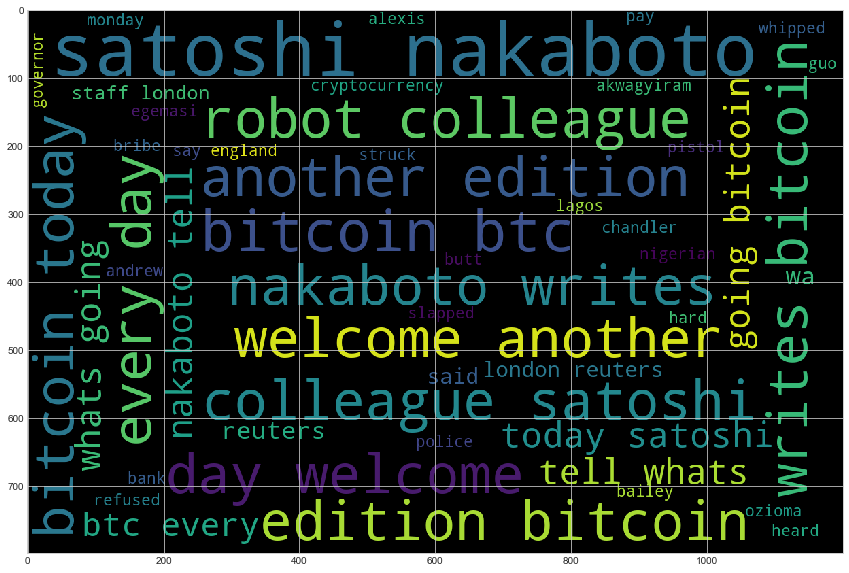

In [157]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

btc_string=' '.join(processed_btc_tokenizer)
btc_wc = WordCloud(width=1200, height=800, max_words=50).generate(btc_string)
plt.imshow(btc_wc)

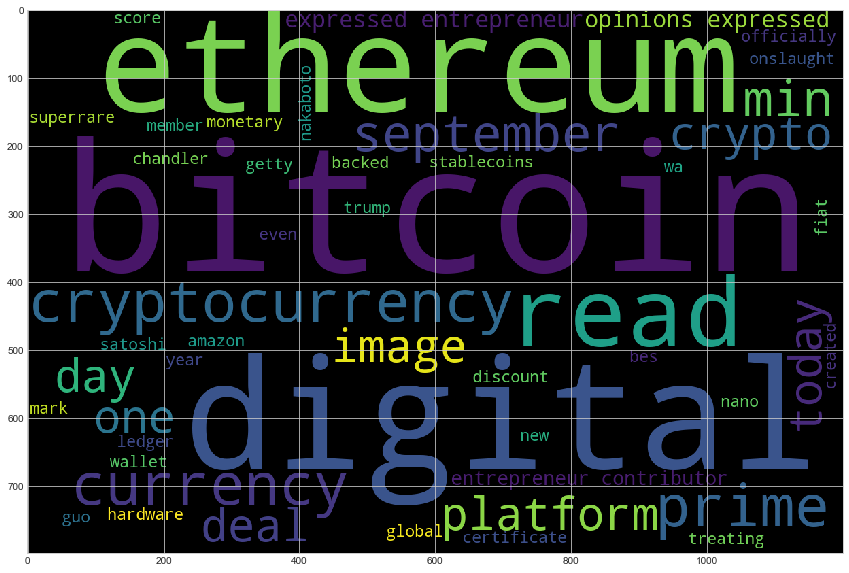

In [158]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_string=' '.join(processed_eth_tokenizer)
eth_wc = WordCloud(width=1200, height=800, max_words=50).generate(eth_string)
plt.imshow(eth_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [159]:
import spacy
from spacy import displacy

In [160]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [161]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [162]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
processed_btc

'Image copyrightChandler GuoImage caption\r\n Chandler Guo at one of his cryptocurrency mines\r\nChandler Guo was a pioneer in cryptocurrency, the digital currencies that can be created and used independe… [+5995 chars]World News\r\nAlexis Akwagyiram\r\nLAGOS (Reuters) - Ozioma Egemasi says Nigerian police slapped, whipped and struck him with the butt of a pistol when he refused to pay them a bribe. Then he heard them … [+6412 chars]A US district judge has sentenced a UK National to five years in federal prison for participating in the cybercrime activities of hacking collective group “The Dark Overlord.” Nathan Wyatt was extrad… [+961 chars]Emerging Markets\r\nAlexis Akwagyiram\r\nLAGOS (Reuters) - Ozioma Egemasi says Nigerian police slapped, whipped and struck him with the butt of a pistol when he refused to pay them a bribe. Then he heard… [+5721 chars]July 15 was, at first, just another day for Parag Agrawal, the chief technology officer of Twitter. Everything seemed normal on the 

In [163]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_doc=nlp(processed_btc)
# Add a title to the document
# YOUR CODE HERE!
btc_doc.user_data['title']='Bitcoin NER'


In [164]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_doc, style='ent')

In [165]:
# List all Entities
# YOUR CODE HERE!
btc_entities = [(ent.text, ent.label_) for ent in btc_doc.ents ]
btc_entities

[('Chandler Guo', 'PERSON'),
 ('one', 'CARDINAL'),
 ('Chandler Guo', 'PERSON'),
 ('Reuters', 'ORG'),
 ('Ozioma Egemasi', 'ORG'),
 ('Nigerian', 'NORP'),
 ('US', 'GPE'),
 ('five years', 'DATE'),
 ('The Dark Overlord', 'WORK_OF_ART'),
 ('Nathan Wyatt', 'PERSON'),
 ('Alexis Akwagyiram', 'PERSON'),
 ('Reuters', 'ORG'),
 ('Ozioma Egemasi', 'ORG'),
 ('Nigerian', 'NORP'),
 ('first', 'ORDINAL'),
 ('Parag Agrawal', 'ORG'),
 ('Twitter', 'ORG'),
 ('Travis Scot', 'PERSON'),
 ('Satoshi Nakaboto', 'ORG'),
 ('Bitcoin', 'GPE'),
 ('Bitcoin', 'GPE'),
 ('Today', 'DATE'),
 ('Satoshi Nakaboto', 'PERSON'),
 ('Bitcoin', 'GPE'),
 ('Satoshi Nakaboto', 'ORG'),
 ('Bitcoin', 'GPE'),
 ('Bitcoin', 'GPE'),
 ('Today', 'DATE'),
 ('Satoshi Nakaboto', 'PERSON'),
 ('Bitcoin', 'GPE'),
 ('Reuters', 'ORG'),
 ('LONDON', 'GPE'),
 ('Reuters', 'ORG'),
 ('Bank of England', 'ORG'),
 ('Andrew Bailey', 'PERSON'),
 ('Monday', 'DATE'),
 ('Bitcoin', 'GPE'),
 ('Reuters', 'ORG'),
 ('LONDON', 'GPE'),
 ('Reuters', 'ORG'),
 ('Bank of Englan

---

## Ethereum NER

In [166]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
# Run the NER processor on all of the text
# YOUR CODE HERE!
processed_eth

"Breitling is partnering with Arianee to issue a new kind of certificates of authenticity for its luxury watches. Instead of relying on physical certificates, the watchmaker gives you a unique digital… [+1593 chars]September\r\n18, 2020\r\n6 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nFounded over five years ago, the Ethereum platform and its native ether (ETH)\xa0have existed mostly in t… [+6239 chars]September\r\n30, 2020\r\n8 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nIf you’ve had even half an eye on the cryptocurrency space in 2020, then you can’t have missed the sur… [+8935 chars]Portions of the global economy melted down in 2020, but an emerging asset class seems to have reinforced its staying power amid the chaos.\r\nGrayscale Investments, the world's largest digital-currency… [+5397 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.\r\nWelcome to another edition of Bitcoin 

In [167]:
#Run the NER function on all of the text
eth_doc=nlp(processed_eth)
# Add a title to the document
# YOUR CODE HERE!
eth_doc.user_data['title']='Ethereum NER'

In [168]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_doc, style='ent')

In [169]:
# List all Entities
# YOUR CODE HERE!
eth_entities = [(ent.text, ent.label_) for ent in eth_doc.ents ]
eth_entities

[('Arianee', 'PERSON'),
 ('18, 2020', 'DATE'),
 ('6 min', 'QUANTITY'),
 ('five years ago', 'DATE'),
 ('Ethereum', 'ORG'),
 ('ETH', 'ORG'),
 ('30', 'DATE'),
 ('2020', 'DATE'),
 ('8', 'CARDINAL'),
 ('half', 'CARDINAL'),
 ('2020', 'DATE'),
 ('2020', 'DATE'),
 ('Grayscale Investments', 'ORG'),
 ('Satoshi Nakaboto', 'ORG'),
 ('Bitcoin', 'GPE'),
 ('Bitcoin', 'GPE'),
 ('Today', 'DATE'),
 ('Satoshi Nakaboto', 'PERSON'),
 ('Bitcoin', 'GPE'),
 ('Prime Day', 'DATE'),
 ('One', 'CARDINAL'),
 ('the Ledger Nano S', 'WORK_OF_ART'),
 ('39.99', 'MONEY'),
 ('chars]US', 'ORG'),
 ('Donald Trump', 'PERSON'),
 ('First', 'ORDINAL'),
 ('Lady Melania Trump', 'PERSON'),
 ('the White House', 'ORG'),
 ('July 7, 2020', 'DATE'),
 ('JIM WATSON', 'PERSON'),
 ('Getty Images', 'ORG'),
 ('Friday', 'DATE'),
 ('chars]Bitcoin', 'DATE'),
 ('an era', 'DATE'),
 ('Bitcoins', 'ORG'),
 ('SuperRare', 'ORG'),
 ('SuperRare', 'ORG'),
 ('GuoImage', 'ORG'),
 ('Chandler Guo', 'PERSON'),
 ('one', 'CARDINAL'),
 ('Chandler Guo', 'PERSON'),